In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow
# import pandas as pd
# import seaborn as sns

In [2]:
import os
print('Current Workig Directory', os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","valid")


Current Workig Directory c:\Users\PRIYESH\OneDrive\Desktop\potato disease project


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    # batch_size = 32,
    image_size=(128, 128),
    shuffle=True,
    # seed = None,
    # validation_split = None,
    # subset = None,
    interpolation="bilinear",
    # follow_links = False,
    # crop_to_aspect_ratio = False
)

Found 900 files belonging to 3 classes.


In [4]:
# Get the class labels
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    # batch_size = 32,
    image_size=(128, 128),
    shuffle=True,
    # seed = None,
    # validation_split = None,
    # subset = None,
    interpolation="bilinear",
    # follow_links = False,
    # crop_to_aspect_ratio = False
)

Found 300 files belonging to 3 classes.


In [14]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [ ]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs=10)

Epoch 1/10
29/29 [==============================] - 43s 1s/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.1496 - val_accuracy: 0.9567
Epoch 2/10
29/29 [==============================] - 42s 1s/step - loss: 0.0150 - accuracy: 0.9944 - val_loss: 0.1534 - val_accuracy: 0.9467
Epoch 3/10
29/29 [==============================] - 46s 2s/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.2297 - val_accuracy: 0.9367
Epoch 4/10
29/29 [==============================] - 44s 2s/step - loss: 0.0707 - accuracy: 0.9767 - val_loss: 0.1331 - val_accuracy: 0.9533
Epoch 5/10
29/29 [==============================] - 43s 1s/step - loss: 0.0187 - accuracy: 0.9978 - val_loss: 0.1589 - val_accuracy: 0.9567
Epoch 6/10
29/29 [==============================] - 45s 2s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9567
Epoch 7/10
29/29 [==============================] - 44s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1415 - val_accuracy: 0.9667
Epoch 8/10
29/29 [==

In [49]:
train_loss = train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 [==============================] - 6s 194ms/step - loss: 0.0029 - accuracy: 0.9989
Training accuracy: [0.002903879852965474, 0.9988889098167419]


In [50]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation_accuracy', val_acc)

10/10 [==============================] - 2s 185ms/step - loss: 0.1939 - accuracy: 0.9567
Validation_accuracy 0.9566666483879089


In [51]:
cnn.save('trained_plant_disease_model.keras')

In [52]:
training_history.history

{'loss': [0.02237161621451378,
  0.015013858675956726,
  0.015362619422376156,
  0.07067149132490158,
  0.018706897273659706,
  0.00422196090221405,
  0.0017591723008081317,
  0.0008333387668244541,
  0.0021793844643980265,
  0.003988401498645544],
 'accuracy': [0.9933333396911621,
  0.9944444298744202,
  0.995555579662323,
  0.9766666889190674,
  0.9977777600288391,
  1.0,
  1.0,
  1.0,
  0.9988889098167419,
  1.0],
 'val_loss': [0.14959730207920074,
  0.15342964231967926,
  0.22966527938842773,
  0.13310322165489197,
  0.15892340242862701,
  0.1414368748664856,
  0.14149940013885498,
  0.143318310379982,
  0.18769799172878265,
  0.1938917487859726],
 'val_accuracy': [0.9566666483879089,
  0.9466666579246521,
  0.9366666674613953,
  0.95333331823349,
  0.9566666483879089,
  0.9566666483879089,
  0.9666666388511658,
  0.9666666388511658,
  0.95333331823349,
  0.9566666483879089]}

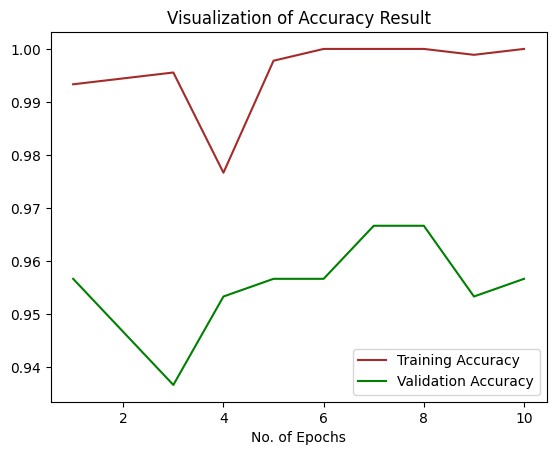

In [53]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()